## Name - Avinash Adsare

## Roll No - 43501

# Assignment no 3 
##  Build the Image classification model by dividing the model into the following fourstages:
    a. Loading and preprocessing the image data
    b. Defining the model’s architecture
    c. Training the model
    d. Estimating the model’s performance

## Cifar 10 image dataset
<img src="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/16_cnn_cifar10_small_image_classification/small_images.jpg"/>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data() #cifar contain 10 classes

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

There are 50000 training images and 10000 testing images

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is an 2d array but for our classification we will convert it to 1d array

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let plot some images from the dataset 

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

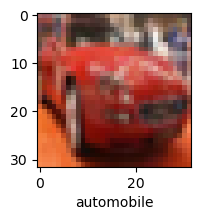

In [13]:
plot_sample(X_train, y_train, 5)

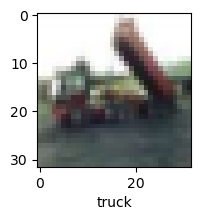

In [14]:
plot_sample(X_train, y_train,2)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

## Normalizing the training data

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Building CNN model

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = cnn.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 37ms/step - loss: 1.4214 - accuracy: 0.4988 - val_loss: 1.7280 - val_accuracy: 0.4435
Epoch 2/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.0593 - accuracy: 0.6273 - val_loss: 1.6443 - val_accuracy: 0.4671
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9041 - accuracy: 0.6856 - val_loss: 1.1306 - val_accuracy: 0.6121
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7990 - accuracy: 0.7191 - val_loss: 1.0206 - val_accuracy: 0.6557
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7199 - accuracy: 0.7502 - val_loss: 0.9471 - val_accuracy: 0.6779
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6487 - accuracy: 0.7702 - val_loss: 1.0799 - val_accuracy: 0.6528
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5896 - accuracy: 0.7884 - val_loss: 0.9678 -

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0455 - accuracy: 0.6874


[1.045479416847229, 0.6873999834060669]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 7ms/step


array([[1.81121994e-02, 4.95755188e-02, 1.55952442e-02, 5.56798577e-01,
        1.11689866e-02, 5.91328256e-02, 8.07930976e-02, 4.42865567e-05,
        1.56086655e-02, 1.93170667e-01],
       [1.94650167e-03, 9.62047935e-01, 2.08962581e-09, 2.48578509e-08,
        1.24472386e-11, 9.73953487e-11, 3.46520523e-09, 2.65033308e-11,
        1.10173179e-02, 2.49881539e-02],
       [3.62170041e-02, 8.12041387e-03, 1.83058379e-04, 1.79014669e-03,
        4.03756576e-06, 4.50260013e-05, 5.96327209e-06, 8.74723494e-03,
        1.65191665e-01, 7.79695392e-01],
       [8.33285213e-01, 8.06641998e-04, 1.27550326e-02, 1.12622103e-03,
        1.11661293e-02, 2.99677540e-05, 5.05061726e-05, 1.90525880e-05,
        1.37053639e-01, 3.70767363e-03],
       [3.02721098e-10, 1.17175723e-07, 7.67007223e-05, 2.03802274e-03,
        9.97365415e-01, 6.05894529e-05, 4.59105126e-04, 6.12872864e-09,
        4.23063398e-08, 1.59530575e-08]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 9, 0, 4]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

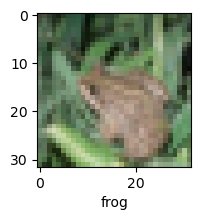

In [24]:
plot_sample(X_test, y_test,4)

In [25]:
classes[y_classes[4]]

'deer'

## Plotting the graphs of Accuracy and loss

In [26]:
from keras import Sequential 

Text(0.5, 1.0, 'Training and Validation Accuracy')

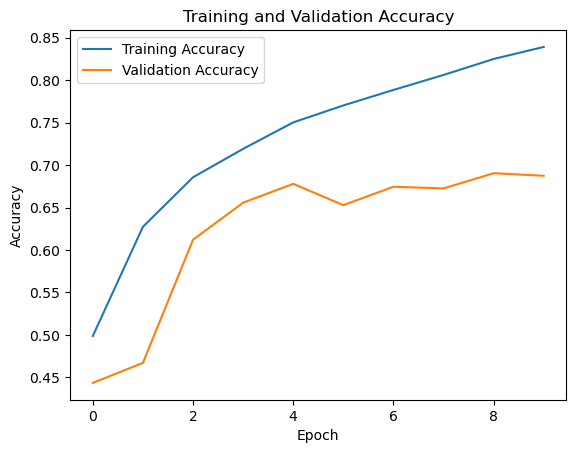

In [27]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

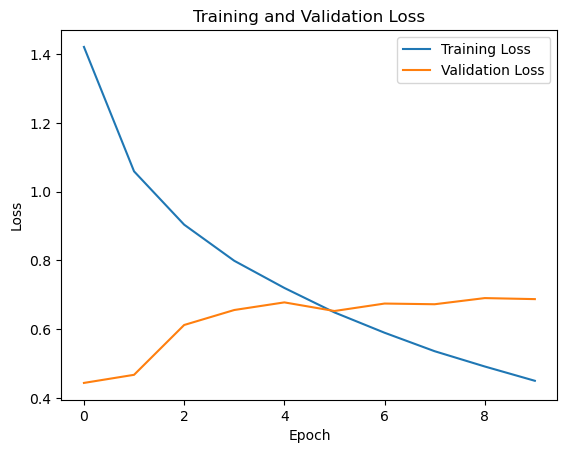

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

In [29]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
